In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [8]:
# first, load the data
datafile = np.load("EEG_data.npz")

# what objects are inside this data file?
print(datafile.files)

# load the eeg_data
# this dataset is an EEG recording with 8 channels and 101638 timepoints
eeg_data = datafile["eeg_data"]
print("eeg_data shape:", eeg_data.shape)

# get the sampling rate (Fs) in Hz
Fs = datafile["Fs"]
print("sampling rate:", Fs)

['eeg_data', 'Fs']
eeg_data shape: (8, 101638)
sampling rate: 128.0


## Plot some of the EEG data timeseries

Make 4 plots of the EEG data timeseries:
* One plot showing half a second of data (how many samples is this?)
* One plot showing two seconds of data
* One plot showing 10 seconds of data
* One plot showing 100 seconds data

You can start with just plotting one channel for each, but you should also try plotting all 8 channels on the same axis.

For each plot you need to figure out how many samples to include. You know that the sampling rate (the variable `Fs` that we loaded from the datafile) is 128 Hz, or 128 samples per second.

Please label at least the x-axis of each plot.

It would also be cool if the plots had an x-axis with units of seconds instead of samples.

In [16]:
# plot half a second

In [17]:
# plot 2 seconds

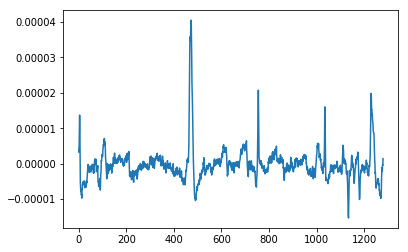

In [26]:
# plot 10 seconds
plt.plot(eeg_data[0,:128*10])

In [19]:
# plot 1000 seconds

## Plot the power spectrum (psd) of one channel of the EEG data

Use the function `plt.psd` that we talked about in lecture 28 (see the notebook `Fourier.ipynb` in that lecture for a demo) to plot the power spectrum of one EEG channel. Set the sampling rate `Fs` correctly so that you get the correct units of frequency.

Then plot the power spectra for all 8 EEG channels in the same axis.

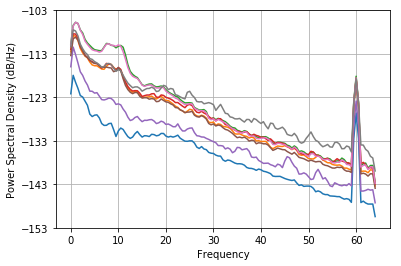

In [23]:
# plot one power spectrum
for d in eeg_data:
    plt.psd(d, Fs=Fs);

In [24]:
# plot all 8 power spectra in the same axis

### Features of the power spectrum
* The power spectrum is _not_ flat. Instead, it has a reasonably linear slope, meaning that low frequencies are much stronger than high frequencies. Any ideas why?
* What's going on at around 10 Hz?
* What's going on at around 60 Hz?

## Plot a spectrogram of the EEG data
Use the `plt.specgram` function to plot a spectrogram of the first 60 seconds of the EEG data from one channel. You'll need to set the parameter `Fs` appropriately. Label the x- and y-axes appropriately.

Next, try playing with the `NFFT` and `noverlap` parameters to `plt.specgram`. Some settings of these parameters are illegal and will make `specgram` error--specifically, `noverlap` needs to be smaller than `NFFT`. What effect do these parameters have?

In [45]:
# plot a spectrogram

In [46]:
# play with noverlap and NFFT parameters. what effect do they have?

## Filter the EEG data to remove noise

The big spike at 60 Hz is definitely noise. Let's filter the EEG signal to remove it.

The simplest thing to do would be to low-pass filter just below 60 Hz (since there probably isn't much interesting signal in the 60-64 Hz range anyway, and 64 Hz is the highest frequency we can see here -- Nyquist!!).

First design a low-pass filter using `signal.firwin`. You should set the `cutoff` frequency to something like 55 Hz, and make sure to set the sampling rate `fs` so that `firwin` knows how to handle the cutoff frequency you give it. Look at the docs for `signal.firwin` and check out the demos and notes for lecture 29 to see a demo of how to use this function. You'll also need to choose the number of taps in the filter--remember that fewer taps means a "softer" filter, while more taps means a "sharper" filter. You can play with this parameter later.

Second plot your filter using `plt.plot` to see what it looks like.

Third use `signal.freqz` to get the frequency response of your filter, and plot it. (Remember that the frequencies `freqz` gives you are "helpfully" in units of radians per sample. You should figure out how to convert these units to Hz. Again, see lecture 29 demos and notes for example.) 

Fourth apply the filter to the EEG data from one channel using `np.convolve`. Plot the first 10 seconds of the result as well as the first 10 seconds of the original signal on the same axis. How do they compare?

Fifth plot the power spectrum of the resulting signal.

In [47]:
# design a low-pass filter

# plot the filter

# plot the frequency response of the filter

# filter the signal from one EEG channel

# plot filtered & original data in same axis to compare

# plot power spectrum of the filtered EEG data